# Метод наименьших квадратов для многочлена

Прогнозируемая модель должна принимать форму полинома:
$f(x)=a_0+a_1x+a_2x^2+\dots+a_nx^n$

В рамках задачи метод наименьших квадратов заключается в том, чтобы взять в качестве параметров $a_n$ такие значения, чтобы сумма квадратов ошибок прогноза была минимальной:
$\sum_{i=0}^n (y_i - \hat{y}_i)^2 \to \min$, где $\hat{y}_i$ — прогнозируемое значение $y_i$.

Чтобы найти неизвестные параметры $a_n$ в матричной форме, необходимо упростить формулу:

$(A^TA)^{-1}A^TA \cdot \mathbf{a} = (A^TA)^{-1}A^T \cdot \mathbf{y}$
$A^TA \cdot \mathbf{a} = A^T \cdot \mathbf{y}$

Финальная формула для нахождения искомых параметров **a**:
$\mathbf{a}=(A^TA)^{-1}A^T \mathbf{y}$

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
x = np.linspace(1, 10, 10)

In [113]:
# Функция для предсказания
f = lambda x: 10

In [114]:
ex = np.random.normal(-1, 1, len(x))

In [115]:
e = 10 # множитель шума
y = f(x) + e * ex  # данные с шумом

In [220]:
# Степень многочлена
degree = 15

In [221]:
# Строим матрицу Вандермонда
X = np.vander(x, degree+1, increasing=True)  # [1, x, x^2, ...]

In [222]:
# Решаем нормальные уравнения: (X^T X) a = X^T y
XT = X.T
A = XT @ X
b = XT @ y

In [223]:
# Вместо np.linalg.solve(A, b)
A_inv = np.linalg.inv(A)   # обратная матрица
coeffs = A_inv @ b

In [224]:
print("Коэффициенты многочлена:", coeffs)

Коэффициенты многочлена: [ 2.86414219e+02 -4.71172470e+02  4.46033707e+01  4.13381538e+02
 -3.96940742e+02  1.77367079e+02 -4.40725536e+01  5.78396958e+00
 -1.92911815e-01 -4.97894473e-02  6.01011241e-03  6.10942807e-05
 -5.51636257e-05  3.97828435e-06 -9.96712313e-08  2.70112155e-10]


In [225]:
# Строим аппроксимирующую кривую
x_fit = np.linspace(min(x), max(x), 200)
X_fit = np.vander(x_fit, degree+1, increasing=True)
y_fit = X_fit @ coeffs

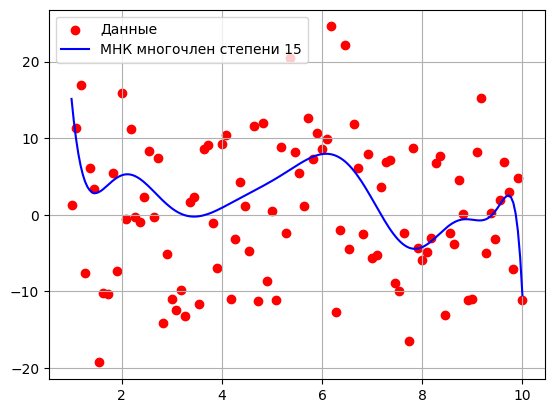

In [226]:
# График
plt.scatter(x, y, color="red", label="Данные")
plt.plot(x_fit, y_fit, color="blue", label=f"МНК многочлен степени {degree}")
plt.legend()
plt.grid(True)
plt.show()

In [227]:
y_pred = X @ coeffs
# Ошибки
errors = y - y_pred
# Сумма квадратов ошибок (расстояние по МНК)
S = np.sum(errors**2)
print("Сумма квадратов отклонений (расстояние):", S)

Сумма квадратов отклонений (расстояние): 7587.948491114643


## Расстояние между функцией и набором точек

Методом наименьших квадратов посчитайте расстояние между функцией y = x2 + 1 и набором точек:
| i | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|---|---|---|---|---|---|---|---|---|---|---|
| $x_i$ | -0.5 | 0.81 | 0.99 | 0.65 | 2.9 | 1.4 | 3.2 | 0.01 | 2.13 | 1.7 |
| $y_i$ | -3.67 | 2.99 | 1.83 | 3.95 | 2.11 | 4.15 | 0.23 | 2.22 | 1.01 | 4.56 |


In [13]:
# Данные
x = np.array([-0.5, 0.81, 0.99, 0.6, 5, 2.9, 1.4, 3.2, 0.01, 2.13])
y = np.array([-3.67, 2.99, 1.83, 3.95, 2.11, 4.15, 0.23, 2.22, 1.01, 4.56])

In [14]:
# Функция
f = lambda x: x**2 + 1

In [15]:
# Вычисляем значения функции в точках xi
y_pred = f(x)
y_pred

array([ 1.25  ,  1.6561,  1.9801,  1.36  , 26.    ,  9.41  ,  2.96  ,
       11.24  ,  1.0001,  5.5369])

In [16]:
# Ошибки
errors = y - y_pred

In [17]:
# Сумма квадратов ошибок (расстояние по МНК)
S = np.sum(errors**2)
print("Сумма квадратов отклонений (расстояние):", S)

Сумма квадратов отклонений (расстояние): 720.8837508400001


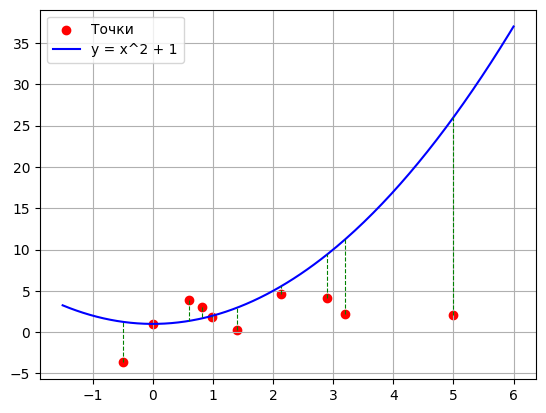

In [18]:
# График
x_plot = np.linspace(min(x)-1, max(x)+1, 200)
y_plot = f(x_plot)

plt.scatter(x, y, color="red", label="Точки")
plt.plot(x_plot, y_plot, color="blue", label="y = x^2 + 1")
for xi, yi, fi in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, fi], "g--", linewidth=0.8)  # линии ошибок
plt.legend()
plt.grid(True)
plt.show()

## Тестирование МНК на реальных данных

In [19]:
df = pd.read_csv(
    'Moscow_Housing_Price_Dataset_nan_24_PREPARED.csv', # путь к файлу через символ "/", (используйте автодополнение)
    sep       = ',' ,
    decimal   = '.' ,
    header    = 0,  # если заголовки в нулевой строке таблицы,
        #  header=None если заголовки отсутствуют
    #na_values =  ['???', ' '], # доп. символы для обозначения отсутствующих значений
)

df[0:2] # отобразить первые строки таблицы df

,Price,Metro station_0,Metro station_1,Metro station_2,Metro station_3,Metro station_4,Metro station_5,Metro station_6,Metro station_7,Metro station_8,...,Living area,Kitchen area,Floor,Number of floors,Apartment_type_Digit,Region_Digit,Renovation_N_Cosmetic,Renovation_N_Designer,Renovation_N_European-style renovation,Renovation_N_Without renovation
0,9000000.0,0,0,0,0,0,0,0,0,0,...,20.0,10.0,6.0,15,0,0,0,0,1,0
1,11090000.0,0,0,0,0,0,0,0,0,1,...,16.2,13.1,10.0,25,0,0,1,0,0,0


In [20]:
# Данные
x = df["Area"]
y = df["Price"]  # данные с шумом

In [21]:
# Степень многочлена
degree = 1

In [22]:
# Строим матрицу Вандермонда
X = np.vander(x, degree+1, increasing=True)  # [1, x, x^2, ...]

In [23]:
# Решаем нормальные уравнения: (X^T X) a = X^T y
XT = X.T
A = XT @ X
b = XT @ y

In [24]:
A_inv = np.linalg.inv(A)   # обратная матрица
coeffs = A_inv @ b

In [25]:
print("Коэффициенты многочлена:", coeffs)

Коэффициенты многочлена: [-8458362.84914483   453267.6594187 ]


In [26]:
# Строим аппроксимирующую кривую
x_fit = np.linspace(min(x), max(x), 200)
X_fit = np.vander(x_fit, degree+1, increasing=True)
y_fit = X_fit @ coeffs

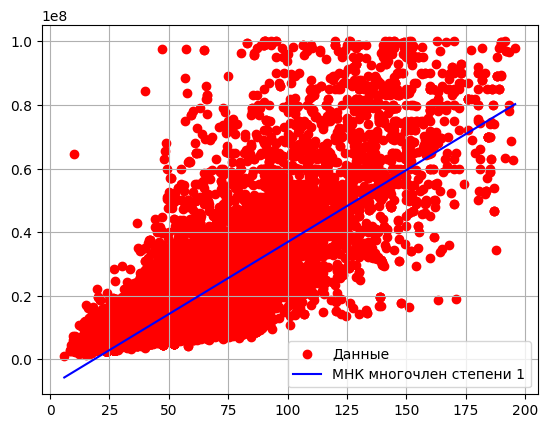

In [27]:
# График
plt.scatter(x, y, color="red", label="Данные")
plt.plot(x_fit, y_fit, color="blue", label=f"МНК многочлен степени {degree}")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
def PRINTR2(coeffs, y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    print ("Метод наименьших квадратов")
    print ("Многочлен y(X) = k0*x0 + ... kN*xN + b")
    print(f"y = f(X) = ")
    for i, kN in enumerate (coeffs):
        if (i != 0) : print(f" {' ' if i==1 else '+'}  {kN:.3f} * x{i} ")
    print(f" {'+'}  {coeffs[0]:.3f}")
    print("\n")

    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    '''
    mae  = metrics.mean_absolute_error(y_test, y_pred)
    mse  = metrics.mean_squared_error (y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score           (y_test, y_pred)
    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format      ( r2 ))

In [29]:
y_pred = X @ coeffs

In [30]:
PRINTR2(coeffs, y, y_pred)

Метод наименьших квадратов
Многочлен y(X) = k0*x0 + ... kN*xN + b
y = f(X) = 
    453267.659 * x1 
 +  -8458362.849


MAE : 7,461,675.093 (средняя абсолютная ошибка)
MSE : 116,094,371,305,225.843750 (среднеквадратичная ошибка)
RMSE: 10,774,709.801439 (кв. корень из среднеквадратичной ошибки)
R2  :     0.611 (коэфф. детерминации)
